In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
path_fire_train = "/kaggle/input/forest-fire-images/Data/Train_Data/Fire"
loc_fire_train = []
for x in os.listdir(path_fire_train):
    loc_fire_train.append(path_fire_train + "/" + x)
loc_fire_train[:10]

['/kaggle/input/forest-fire-images/Data/Train_Data/Fire/F_2302.jpg',
 '/kaggle/input/forest-fire-images/Data/Train_Data/Fire/F_1952.jpg',
 '/kaggle/input/forest-fire-images/Data/Train_Data/Fire/F_1389.jpg',
 '/kaggle/input/forest-fire-images/Data/Train_Data/Fire/F_2089.jpg',
 '/kaggle/input/forest-fire-images/Data/Train_Data/Fire/F_395.jpg',
 '/kaggle/input/forest-fire-images/Data/Train_Data/Fire/F_2225.jpg',
 '/kaggle/input/forest-fire-images/Data/Train_Data/Fire/F_861.jpg',
 '/kaggle/input/forest-fire-images/Data/Train_Data/Fire/F_2032.jpg',
 '/kaggle/input/forest-fire-images/Data/Train_Data/Fire/F_604.jpg',
 '/kaggle/input/forest-fire-images/Data/Train_Data/Fire/F_1136.jpg']

In [4]:
path_nofire_train = "/kaggle/input/forest-fire-images/Data/Train_Data/Non_Fire"
loc_nofire_train = []
for x in os.listdir(path_nofire_train):
    loc_nofire_train.append(path_nofire_train + "/" + x)
loc_nofire_train[:10]

['/kaggle/input/forest-fire-images/Data/Train_Data/Non_Fire/NF_2233.jpg',
 '/kaggle/input/forest-fire-images/Data/Train_Data/Non_Fire/NF_1161.jpg',
 '/kaggle/input/forest-fire-images/Data/Train_Data/Non_Fire/NF_705.jpg',
 '/kaggle/input/forest-fire-images/Data/Train_Data/Non_Fire/NF_1774.jpg',
 '/kaggle/input/forest-fire-images/Data/Train_Data/Non_Fire/NF_676.jpg',
 '/kaggle/input/forest-fire-images/Data/Train_Data/Non_Fire/NF_2423.jpg',
 '/kaggle/input/forest-fire-images/Data/Train_Data/Non_Fire/NF_751.jpg',
 '/kaggle/input/forest-fire-images/Data/Train_Data/Non_Fire/NF_1735.jpg',
 '/kaggle/input/forest-fire-images/Data/Train_Data/Non_Fire/NF_2041.jpg',
 '/kaggle/input/forest-fire-images/Data/Train_Data/Non_Fire/NF_1092.jpg']

In [5]:
path_fire_test = "/kaggle/input/forest-fire-images/Data/Test_Data/Fire"
loc_fire_test = []
for x in os.listdir(path_fire_test):
    loc_fire_test.append(path_fire_test + "/" + x)
loc_fire_test[:10]

['/kaggle/input/forest-fire-images/Data/Test_Data/Fire/F_19.jpg',
 '/kaggle/input/forest-fire-images/Data/Test_Data/Fire/F_10.jpg',
 '/kaggle/input/forest-fire-images/Data/Test_Data/Fire/F_2.jpg',
 '/kaggle/input/forest-fire-images/Data/Test_Data/Fire/F_24.jpg',
 '/kaggle/input/forest-fire-images/Data/Test_Data/Fire/F_3.jpg',
 '/kaggle/input/forest-fire-images/Data/Test_Data/Fire/F_14.jpg',
 '/kaggle/input/forest-fire-images/Data/Test_Data/Fire/F_22.jpg',
 '/kaggle/input/forest-fire-images/Data/Test_Data/Fire/F_0.jpg',
 '/kaggle/input/forest-fire-images/Data/Test_Data/Fire/F_13.jpg',
 '/kaggle/input/forest-fire-images/Data/Test_Data/Fire/F_7.jpg']

In [6]:
path_nofire_test = "/kaggle/input/forest-fire-images/Data/Test_Data/Non_Fire"
loc_nofire_test = []
for x in os.listdir(path_nofire_test):
    loc_nofire_test.append(path_nofire_test + "/" + x)
loc_nofire_test[:10]

['/kaggle/input/forest-fire-images/Data/Test_Data/Non_Fire/NF_19.jpg',
 '/kaggle/input/forest-fire-images/Data/Test_Data/Non_Fire/NF_23.jpg',
 '/kaggle/input/forest-fire-images/Data/Test_Data/Non_Fire/NF_11.jpg',
 '/kaggle/input/forest-fire-images/Data/Test_Data/Non_Fire/NF_3.jpg',
 '/kaggle/input/forest-fire-images/Data/Test_Data/Non_Fire/NF_15.jpg',
 '/kaggle/input/forest-fire-images/Data/Test_Data/Non_Fire/NF_0.jpg',
 '/kaggle/input/forest-fire-images/Data/Test_Data/Non_Fire/NF_12.jpg',
 '/kaggle/input/forest-fire-images/Data/Test_Data/Non_Fire/NF_18.jpg',
 '/kaggle/input/forest-fire-images/Data/Test_Data/Non_Fire/NF_6.jpg',
 '/kaggle/input/forest-fire-images/Data/Test_Data/Non_Fire/NF_5.jpg']

In [7]:
import tensorflow as tf

import os

def process_image(image_path, IMG_SIZE=224):
    if not os.path.exists(image_path) or os.path.getsize(image_path) == 0:
#         print(f"Invalid image file: {image_path}")
        return
    
    image = tf.io.read_file(image_path)
    image = tf.io.decode_image(image, channels=3, expand_animations= False)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
    return image



In [8]:
fire_train_images = []
for i in range(len(loc_fire_train)):
    image_path = str(loc_fire_train[i])
    fire_train_images.append(process_image(image_path))

In [9]:
import matplotlib.pyplot as plt

In [10]:
fire_train_images = [img for img in fire_train_images if img is not None]

In [11]:
len(fire_train_images)

2111

In [13]:
nofire_train_images = []
for i in range(len(loc_nofire_train)):
    image_path = str(loc_nofire_train[i])
    nofire_train_images.append(process_image(image_path))
    


In [14]:
nofire_train_images = [img for img in nofire_train_images if img is not None]

In [15]:
fire_test_images = []
for i in range(len(loc_fire_test)):
    image_path = str(loc_fire_test[i])
    fire_test_images.append(process_image(image_path))

nofire_test_images = []
for i in range(len(loc_fire_test)):
    image_path = str(loc_nofire_test[i])
    nofire_test_images.append(process_image(image_path))

In [16]:
len(fire_test_images), len(nofire_test_images)

(25, 25)

In [17]:
labels_train = [1]*len(fire_train_images) + [0]*len(nofire_train_images)

In [18]:
labels_train = np.array(labels_train)
fire_train_images = np.array(fire_train_images)
nofire_train_images = np.array(nofire_train_images)

In [19]:
train_images = np.concatenate((fire_train_images, nofire_train_images))

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_images, labels_train, test_size=0.15)

In [22]:
model = tf.keras.models.load_model("/kaggle/input/trial3/trial3.h5")

In [23]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (None, 1280)              410208    
                                                                 
 sequential_11 (Sequential)  (None, 2)                 128300    
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 538,511
Trainable params: 524,431
Non-trainable params: 14,080
_________________________________________________________________


In [24]:
model.fit(x = X_train, 
         y= y_train, 
         epochs = 20, 
         validation_data = (X_test, y_test), 
         batch_size = 32, 
         verbose = True)

Epoch 1/20
123/123 [==============================] - 206s 2s/step - loss: 0.2347 - accuracy: 0.9469 - val_loss: 0.2145 - val_accuracy: 0.9595
Epoch 2/20
123/123 [==============================] - 194s 2s/step - loss: 0.2197 - accuracy: 0.9513 - val_loss: 0.2261 - val_accuracy: 0.9509
Epoch 3/20
123/123 [==============================] - 195s 2s/step - loss: 0.1888 - accuracy: 0.9635 - val_loss: 0.3520 - val_accuracy: 0.8829
Epoch 4/20
123/123 [==============================] - 193s 2s/step - loss: 0.1668 - accuracy: 0.9722 - val_loss: 0.2822 - val_accuracy: 0.9162
Epoch 5/20
123/123 [==============================] - 193s 2s/step - loss: 0.1537 - accuracy: 0.9745 - val_loss: 0.4277 - val_accuracy: 0.8483
Epoch 6/20
123/123 [==============================] - 191s 2s/step - loss: 0.1885 - accuracy: 0.9541 - val_loss: 0.2188 - val_accuracy: 0.9436
Epoch 7/20
123/123 [==============================] - 190s 2s/step - loss: 0.1441 - accuracy: 0.9714 - val_loss: 0.1685 - val_accuracy: 0.9653

In [41]:
model.save("trial3comp.h5")

In [29]:
len(nofire_test_images)

25

In [27]:
fire_test_images.extend(nofire_test_images)

In [30]:
test_labels = [1]*25 + [0]*25

In [35]:
y_preds_base = model.predict(np.array(fire_test_images))
y_preds_base

2/2 [==============================] - 0s 129ms/step


array([[0.9561491 ],
       [0.9561491 ],
       [0.9561491 ],
       [0.9561491 ],
       [0.9561491 ],
       [0.9561491 ],
       [0.9561491 ],
       [0.9561491 ],
       [0.9561491 ],
       [0.9561491 ],
       [0.4540854 ],
       [0.9561491 ],
       [0.9561491 ],
       [0.9561491 ],
       [0.9561491 ],
       [0.9561491 ],
       [0.9561491 ],
       [0.9561491 ],
       [0.9561491 ],
       [0.9561491 ],
       [0.9561491 ],
       [0.9561491 ],
       [0.9561491 ],
       [0.9561491 ],
       [0.9561491 ],
       [0.03557756],
       [0.03557756],
       [0.03557756],
       [0.03557756],
       [0.03557756],
       [0.46112636],
       [0.03557756],
       [0.03557756],
       [0.03557756],
       [0.03557756],
       [0.03557756],
       [0.46049482],
       [0.03557756],
       [0.03557756],
       [0.03557756],
       [0.03557756],
       [0.03558273],
       [0.03557756],
       [0.03557756],
       [0.06256389],
       [0.03557756],
       [0.03557756],
       [0.035

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [37]:
accuracy_score((y_preds_base>0.5) , test_labels)

0.98

In [38]:
print(classification_report((y_preds_base>0.5) , test_labels))

              precision    recall  f1-score   support

       False       1.00      0.96      0.98        26
        True       0.96      1.00      0.98        24

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



<Axes: >

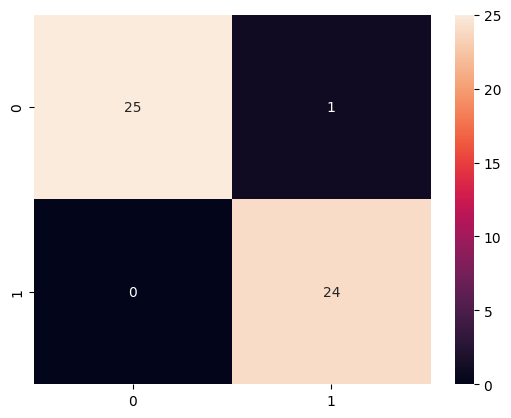

In [40]:
import seaborn as sns
sns.heatmap(confusion_matrix((y_preds_base>0.5) , test_labels), annot=True)